***Sales Predict for BigMart Oultlet branches***

***~ Refael Ivgi / 21/04/22 ~ ***

---





#Basic libraries


---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


#Uploading data file & analyzing the information


---



In [ ]:
from google.colab import files
df = pd.read_csv('data_bigmart.csv')

print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [ ]:
df.info()
#כפי שניתן לראות ישנם בקובץ מספר עמודות שמכילות ערכים אלפא נומרים ובכדי שנוכל לעבוד איתם נצטרך בהמשך לקודד אותם

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.shape
#12 עמודות
#8523 שורות

(8523, 12)

In [ ]:
#בדיקת ערכים חסרים
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#נבצע פעולת דיסקרייב כדי לבחון איזה ערך נוכל ליישם על מקום הערכים החסרים כדי לא לפגום במידע
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#מילוי נלים
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)
df.isna().sum()
#כפי שניתן לראות אין ערכים חסרים בנתונים

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#במסד הנתונים שקיבלנו ישנם 2 קטוגריות : שומן נמוך ורגיל .
#אולם קרתה טעות ולאותו ערך נתנו שמות שונים ולכן אנו צריכים לרכז אותם ל2 הקטגוריות הרצויות
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#Coding to alphanumeric values

---



In [ ]:
from sklearn.preprocessing import LabelEncoder
DataLabel = df.copy()
#We chose a LabelEncoder encoding method because the non-normative information type is cataloged information
#For example: the fat type of the product will be 0 and 1 because there are only 2 categories
encoder = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()

DataLabel['Item_Fat_Content'] = encoder.fit_transform(DataLabel['Item_Fat_Content'])
DataLabel['Outlet_Size'] = encoder.fit_transform(DataLabel['Outlet_Size'])
DataLabel['Outlet_Location_Type'] = encoder.fit_transform(DataLabel['Outlet_Location_Type'])
DataLabel['Outlet_Type'] = encoder.fit_transform(DataLabel['Outlet_Type'])
DataLabel['Item_Identifier'] = encoder2.fit_transform(DataLabel['Item_Identifier'])
DataLabel['Item_Type'] = encoder.fit_transform(DataLabel['Item_Type'])
DataLabel['Outlet_Identifier'] = encoder3.fit_transform(DataLabel['Outlet_Identifier'])

#Graphs

---



In [ ]:
NewData = df.copy()

**We took all the company's branches and made a comparison in relation to sales, and it can be seen that branch 10 and 19 generate less sales from the products, while branch 27 generates the best sales.**

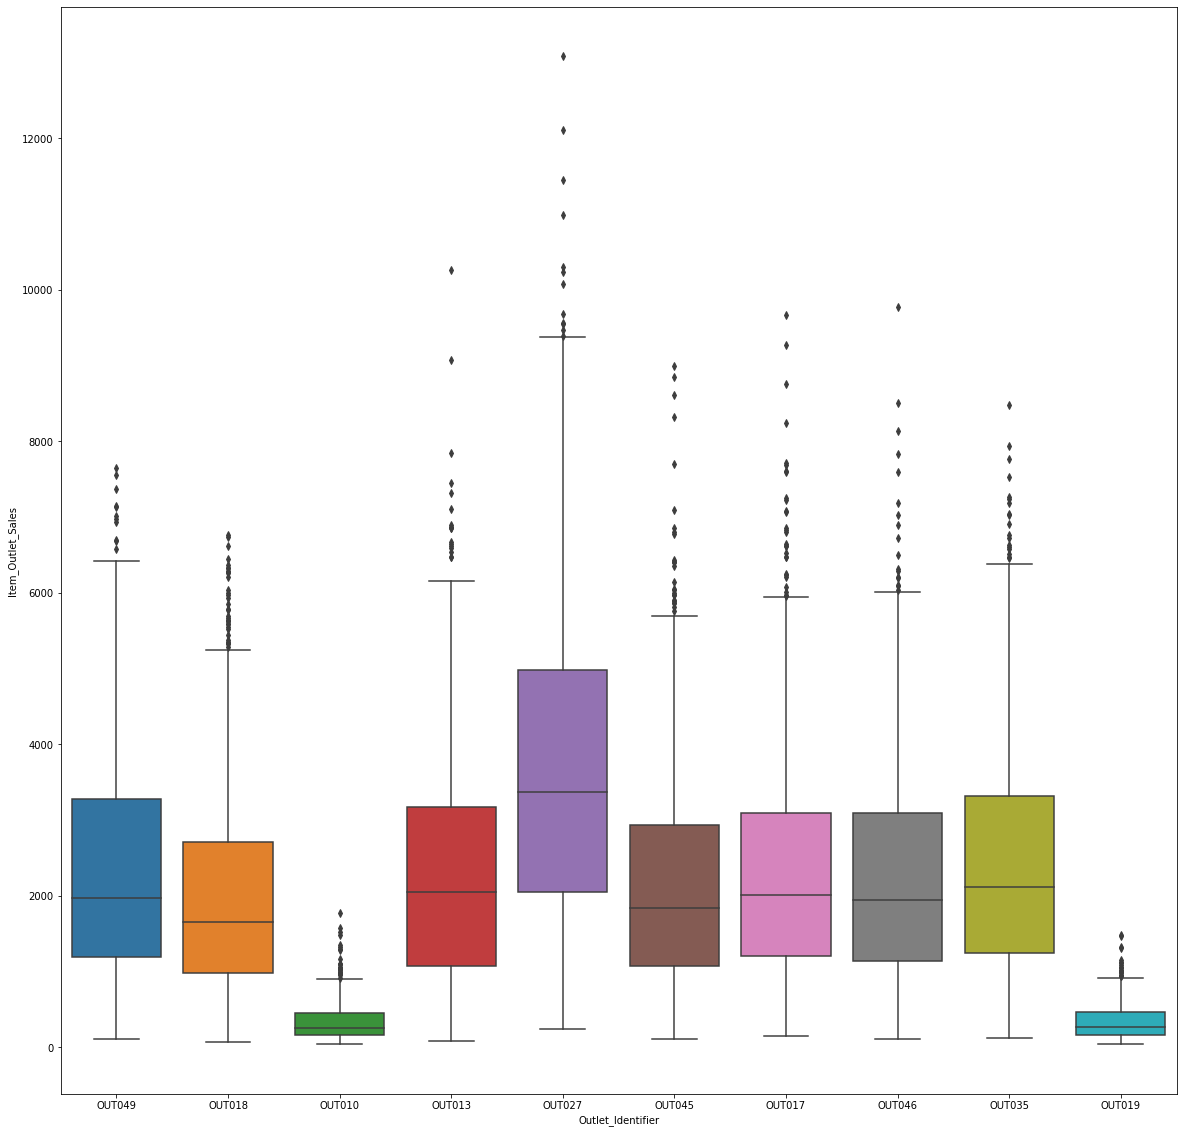

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=NewData, x=NewData['Outlet_Identifier'], y=NewData['Item_Outlet_Sales'])



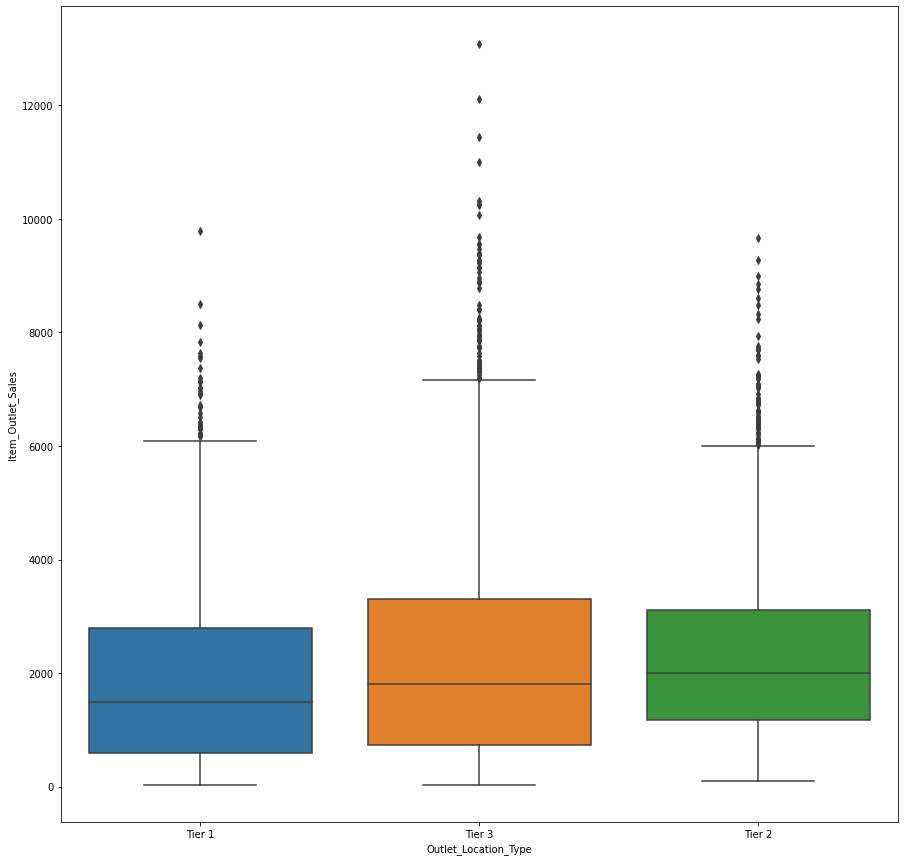

In [ ]:

plt.figure(figsize=(15,15))
sns.boxplot(data=NewData, x=NewData['Outlet_Location_Type'], y=NewData['Item_Outlet_Sales'])


**We took the location of the stores in relation to sales and you can see that phase 2-3 generate the majority of the big sales**

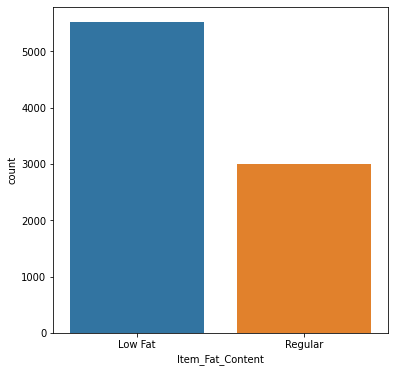

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=NewData)
plt.show()

**Inspection of the products, how many of them are low fat and how many are of the normal type, you can see that the majority of the products are of the low fat type**

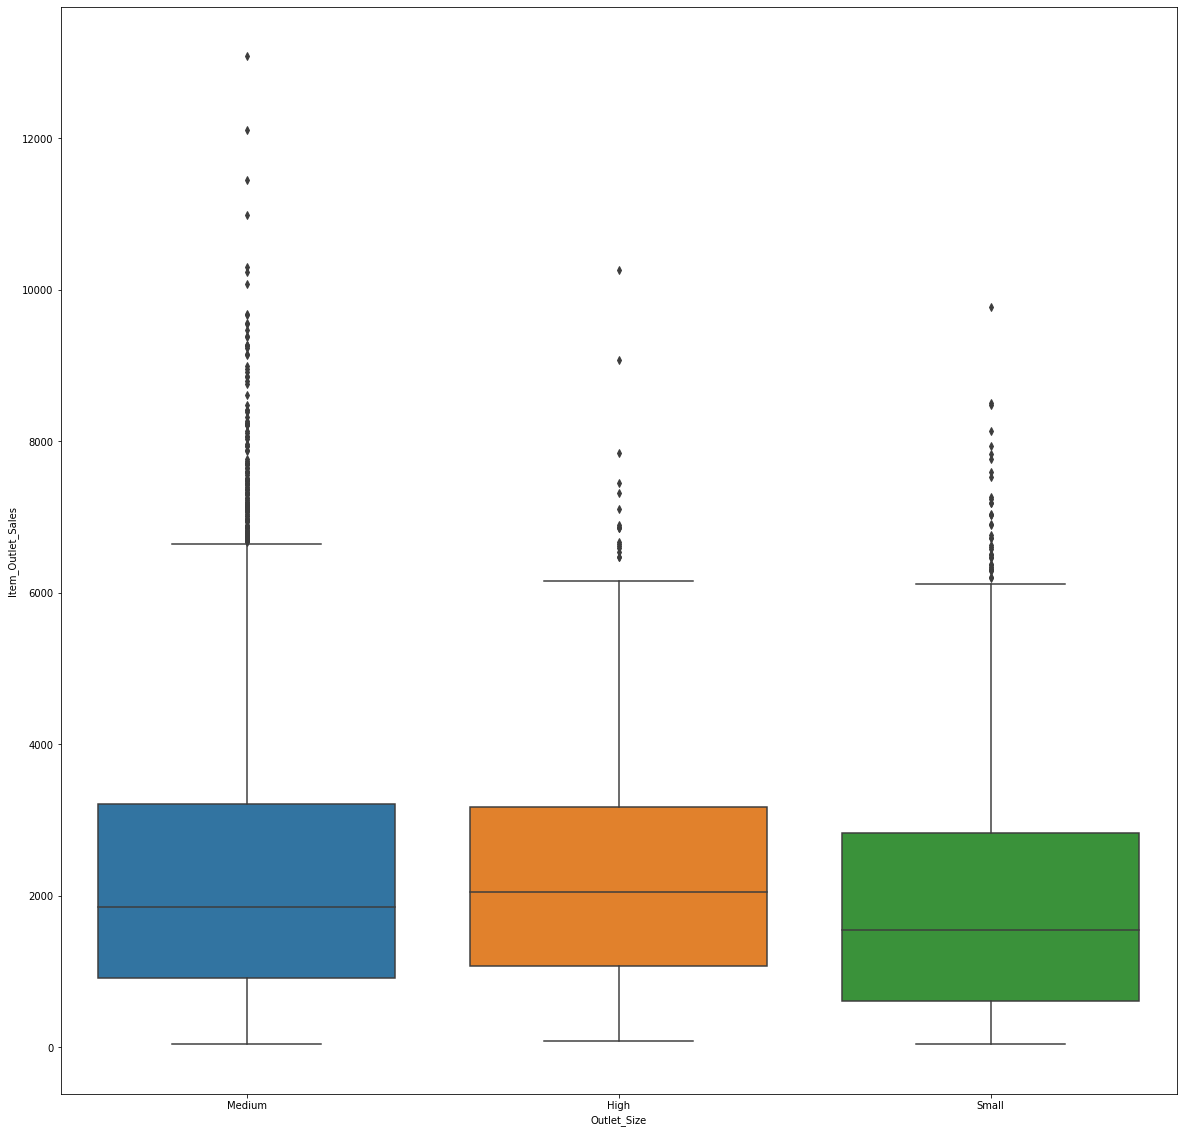

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=NewData, x=NewData['Outlet_Size'], y=NewData['Item_Outlet_Sales'])

#Finding a relationship between the important categories - by correlation


---



**We presented the correlation between the characteristics using a heatmap - basic correlation analysis close to 1 high correlation, close to 0 low correlation, close to 1 - reverse correlation. We will take a characteristic on the horizontal axis and cross it in relation to the origin with the vertical axis and we will see the size of the correlation and thus we will be able to see where there is a greater relationship between each parameter of the information.**

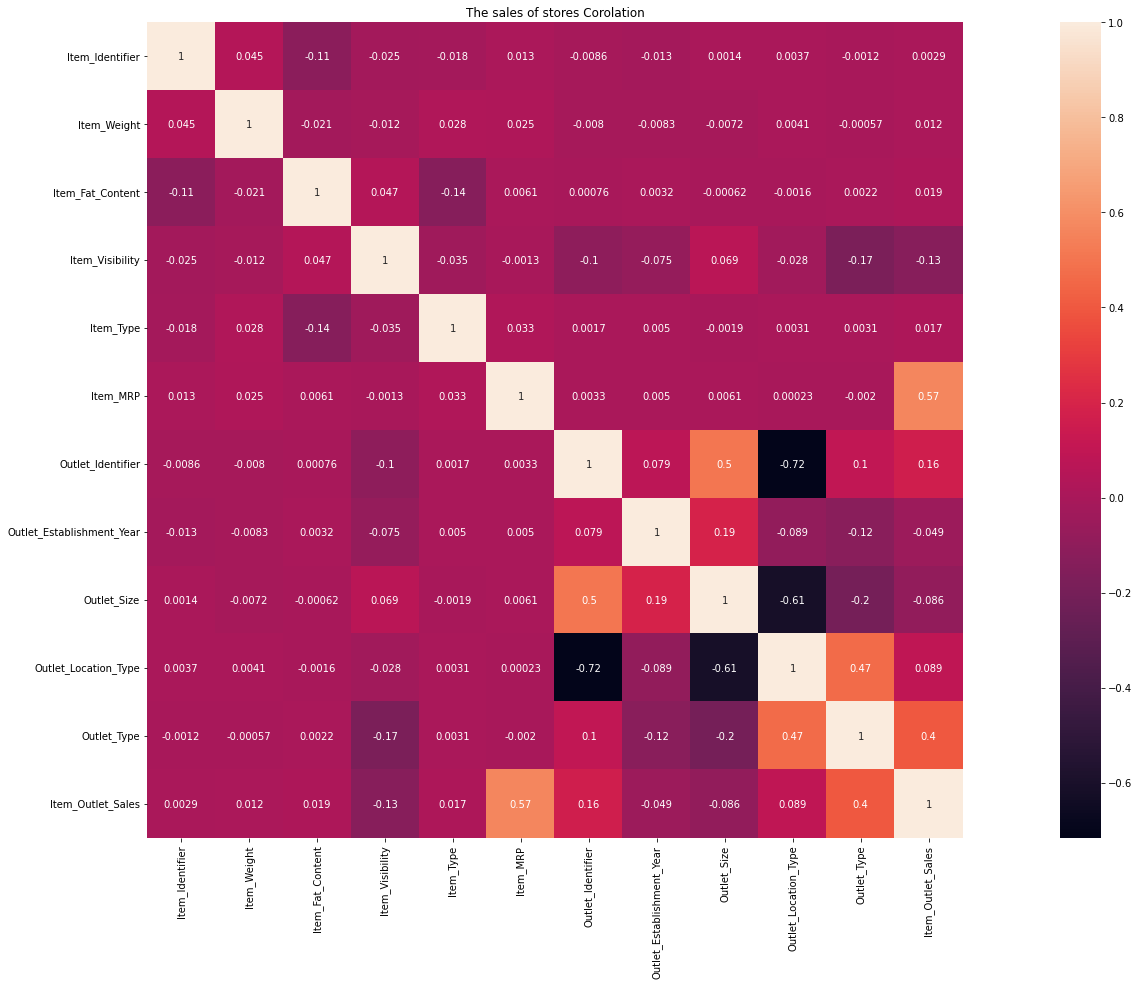

In [ ]:
plt.figure(figsize=(35,15))
sns.heatmap(DataLabel.corr(),vmax=1, square=True,annot=True)
plt.title('The sales of stores Corolation')
plt.show()

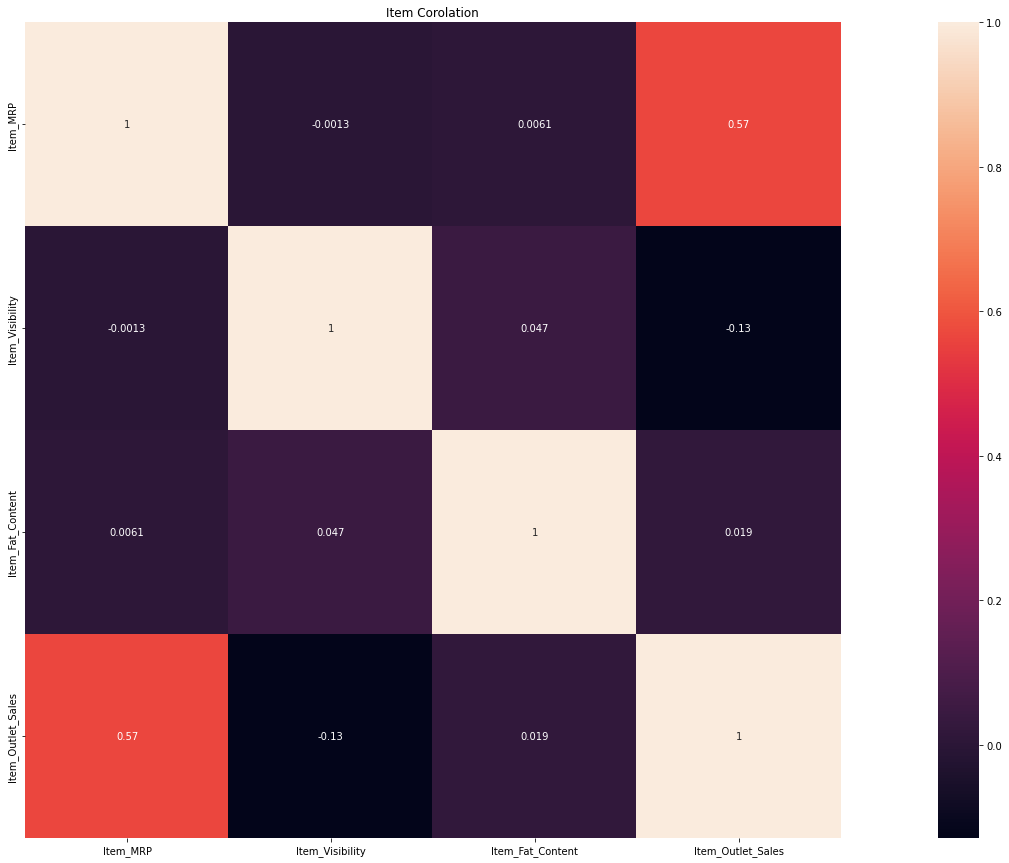

In [ ]:

dataforcorr = DataLabel[['Item_MRP' ,'Item_Visibility' ,'Item_Fat_Content' , 'Item_Outlet_Sales']].copy()
plt.figure(figsize=(35,15))
sns.heatmap(dataforcorr.corr(),vmax=1, square=True,annot=True)
plt.title('Item Corolation')
plt.show()


#Conclusions of the heat maps - correlation

---



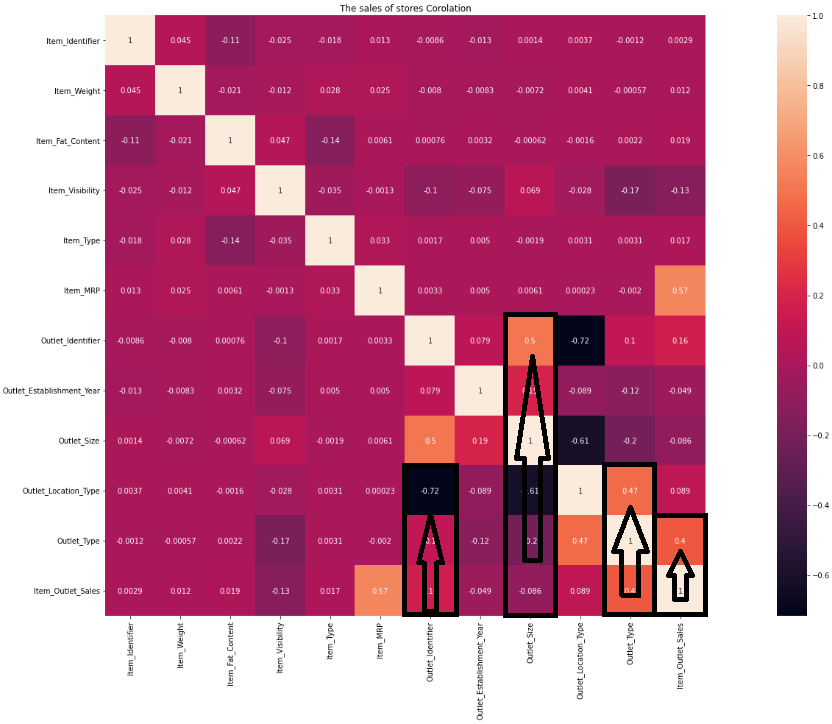


As you can see the important characteristics that have a mutual relationship in relation to the sales of the item:
*   Oulet_Type
*   Oulet_Location_Type
*   Outlet_Identifier



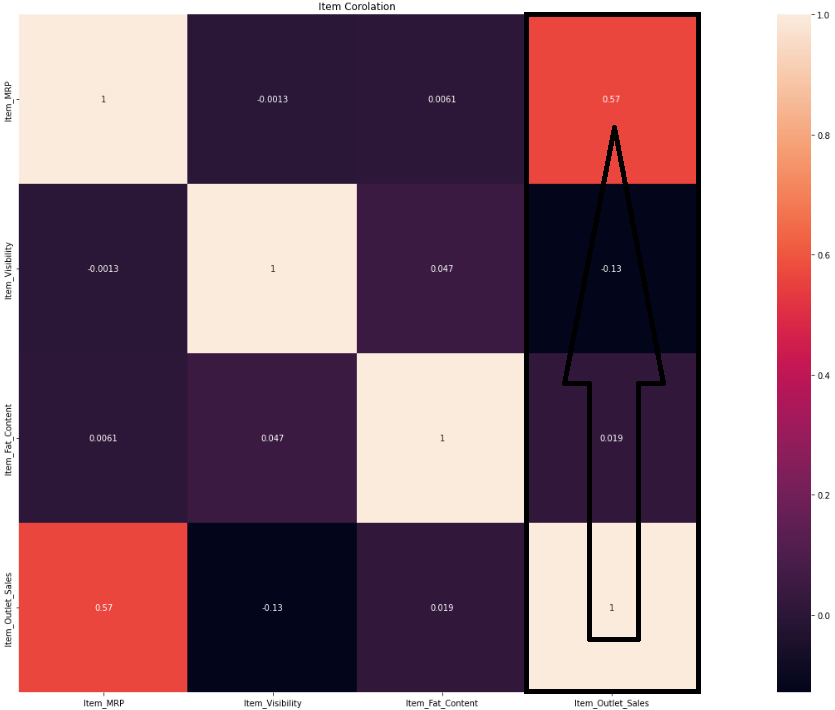

As you can see the important characteristics that have a mutual relationship in relation to the sales of the item:

*   Item_MRP




#Training and testing the model
---



In [ ]:
from sklearn.model_selection import train_test_split
DataForModel = DataLabel.copy()

X = DataForModel.drop(columns='Item_Outlet_Sales', axis=1)
Y = DataForModel['Item_Outlet_Sales']

#The division of information into 70 percent training and 30 percent test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

print(X.shape, X_train.shape, X_test.shape , Y_test.shape , Y_train.shape)

(8523, 11) (5966, 11) (2557, 11) (2557,) (5966,)


#First method - linear regression

---



In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train , Y_train)
regression.predict(X_test)


linear_test_accuracy = round(regression.score(X_test , Y_test)*100)
linear_train_accuracy =round( regression.score(X_train , Y_train)*100)
print ("Test Accuracy - (Linear Regression) = " ,linear_test_accuracy , "%")
print ("Train Accuracy - (Linear Regression) = " ,linear_train_accuracy , "%")



#Relatively low success rate

Test Accuracy - (Linear Regression) =  52 %
Train Accuracy - (Linear Regression) =  51 %


#Second method - decision trees

We defined the amount of branches and leaves, i.e. frames and nodes according to which the machine learns and finally we checked that no overfitting was created

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Decision = DecisionTreeRegressor(max_depth=21, min_samples_leaf=50)

TrainTree = Decision.fit(X_train,Y_train)
Decision_pred = Decision.predict(X_test)

tree_test_accuracy = round(Decision.score(X_test,Y_test)*100)
tree_train_accuracy = round(Decision.score(X_train,Y_train)*100)

print ("Test Accuracy - (Tree Decision) = " , tree_test_accuracy , "%")
print ("Train Accuracy - (Tree Decision) = " , tree_train_accuracy , "%")



Test Accuracy - (Tree Decision) =  58 %
Train Accuracy - (Tree Decision) =  62 %


#A third method - XGBOOST

In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import sklearn.metrics as accuracy_score

XGboost_Test = X_test.copy()
regressoru= XGBRegressor()

regressoru.fit(X_train,Y_train)

test_data_prediction = regressoru.predict(XGboost_Test)
train_data_prediction = regressoru.predict(X_train)
XGboost_test = round(accuracy_score.r2_score(Y_test, test_data_prediction)*100)
XGboost_train = round(accuracy_score.r2_score(Y_train, train_data_prediction)*100)

print('R Squared value (Test Accuracy - XGBoost) = ', XGboost_test, "%")
print('R Squared value (Train Accuracy - XGBoost) = ',XGboost_train, "%")

#High training percentage, high test result as well, good prediction model for the data set


[14:13:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Squared value (Test Accuracy - XGBoost) =  60 %
R Squared value (Train Accuracy - XGBoost) =  63 %


#Fourth method - Random Forest


---



בשיטה זו קיבלנו אוברפיטינג על סט הנתונים ולכן לא נוכל להשתמש בשיטה זו לחיזוי טוב

In [ ]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(X_train,Y_train)
rf.predict(X_test)
rf_accuracy_train = round(rf.score(X_train,Y_train)*100)
rf_accuracy_test = round(rf.score(X_test,Y_test)*100)
print('Train Accuracy - (RandomForest) = ', rf_accuracy_train,"%")
print('Test Accuracy - (RandomForest) = ', rf_accuracy_test,"%")


Train Accuracy - (RandomForest) =  60 %
Test Accuracy - (RandomForest) =  60 %


#Distribution of models by training and test


---



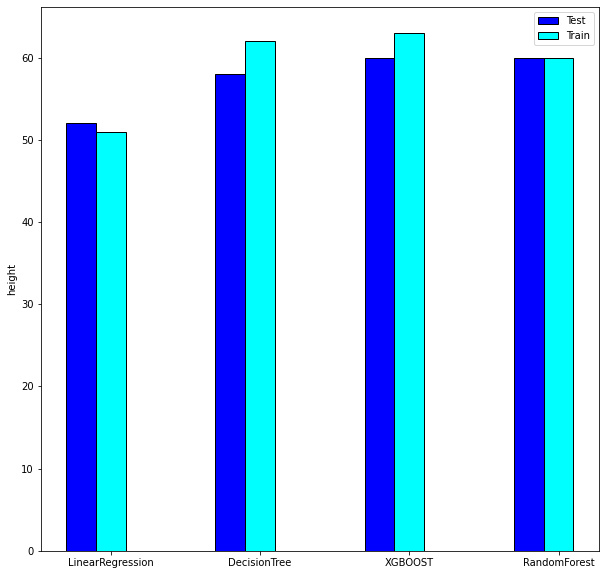

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) 
# Colum Width
barWidth = 0.2
 
# Entering the test data from any prediction method
bars1 = [round(linear_test_accuracy), tree_test_accuracy, XGboost_test ,rf_accuracy_test ]
 
#  Entering the train data from any prediction method
bars2 = [linear_train_accuracy, tree_train_accuracy, XGboost_train ,rf_accuracy_train]
 
# Determining a location for each model
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Creating the graph for the test
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=10, label='Test')
 
# Creating the graph for the train
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=10, label='Train')
 
# Entering the names of the models and a legend for the graph
plt.xticks([r + barWidth for r in range(len(bars1))], ['LinearRegression', 'DecisionTree', 'XGBOOST','RandomForest'])
plt.ylabel('height')
plt.legend()
 
plt.show()


**Conclusions from the distribution graph:** It can be seen that the most suitable prediction method for the data set is ***XGBOOST*** 

In the rest of the models we got a high training percentage, but a relatively low test percentage.

In the Random Forest model, we got overfitting so it doesn't fit our data set.

#OUTPUT - CSV File

---



**After the training set and the tests, we would like to take the 3 relevant columns into a new file, but the coded information must be restored to the original information!**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Restoring the coded information
XGboost_Test['Item_Identifier']=encoder2.inverse_transform(XGboost_Test['Item_Identifier'])
XGboost_Test['Outlet_Identifier'] = encoder3.inverse_transform(XGboost_Test['Outlet_Identifier'])

# Merge the 3 relevant columns into a new set
FinalData = XGboost_Test[['Item_Identifier','Outlet_Identifier']].copy()
FinalData = pd.concat([FinalData , Y_test], axis="columns", join="inner")

# Creating a new file after performing the training and tests
FinalData.to_csv('BigMart_Output.csv', index=False)


